# Loading the libraries

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization,Flatten, ConvLSTM2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=ff45cb31995e443c0c3455da4f1092e25c9ffde6c7535c062ce98ef5ab9a13b8
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


# Loading the data

In [ ]:
# plt.style.use("dark_background")

In [ ]:
personality_class = {"Agreeableness":0,
                     "Conscientiousness":1,
                     "Extraversion":2,
                     "Neuroticism":3,
                     "Openness":4}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_path = "/content/drive/MyDrive/PIP-DL-Project/Dataset Repository/handriting_images_dataset/training_set"
test_path = "/content/drive/MyDrive/PIP-DL-Project/Dataset Repository/handriting_images_dataset/test_set"

In [ ]:
c_data = [] # class data
l_data = [] # label data

In [ ]:
data_list = []
label_list = []

## Getting data from 5 class folders

In [ ]:
for (r,d,f) in os.walk(main_path,topdown=True): # r=root, d=dirs, f=files
    if "Conscientiousness" in r:
        for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Conscientiousness"]))
            label_list.append(personality_class["Conscientiousness"])
    elif "Extraversion" in r:
        for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Extraversion"]))
            label_list.append(personality_class["Extraversion"])
    elif "Agreeableness" in r:
        for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Agreeableness"]))
            label_list.append(personality_class["Agreeableness"])
    elif "Neuroticism" in r:
      for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Neuroticism"]))
            label_list.append(personality_class["Neuroticism"])
    elif "Openness" in r:
        for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Openness"]))
            label_list.append(personality_class["Openness"])
    else:
        pass

In [ ]:
for (r,d,f) in os.walk(test_path,topdown=True):
    if "Conscientiousness" in r:
        for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Conscientiousness"]))
            label_list.append(personality_class["Conscientiousness"])
    elif "Extraversion" in r:
        for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Extraversion"]))
            label_list.append(personality_class["Extraversion"])
    elif "Agreeableness" in r:
        for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Agreeableness"]))
            label_list.append(personality_class["Agreeableness"])
    elif "Neuroticism" in r:
      for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Neuroticism"]))
            label_list.append(personality_class["Neuroticism"])
    elif "Openness" in r:
        for f_ in f:
            data_list.append((os.path.join(r,f_),
                             personality_class["Openness"]))
            label_list.append(personality_class["Openness"])
    else:
        pass

In [ ]:
print(f"TOTAL DATA LENGTH: {len(data_list)}")
print(f"TOTAL CLASS LENGTH: {len(label_list)}")
print(f"UNIQUE TARGETS: {np.unique(label_list)}")

TOTAL DATA LENGTH: 445
TOTAL CLASS LENGTH: 445
UNIQUE TARGETS: [0 1 2 3 4]


In [ ]:
for x_ in range(len(data_list)):
    c_data.append(data_list[x_][0])
    l_data.append(data_list[x_][1])

In [ ]:
print(f"TOTAL DATA LENGTH: {len(c_data)}")
print(f"TOTAL CLASS LENGTH: {len(l_data)}")

TOTAL DATA LENGTH: 445
TOTAL CLASS LENGTH: 445


In [ ]:
c_series = pd.Series(c_data,name="PATH").astype(str)
l_series = pd.Series(l_data,name="CLASS").astype(float)

## Creating a DataFrame of of all data samples

In [ ]:
main_data = pd.concat([c_series,l_series],axis=1) #dataframe

In [ ]:
main_data.head()

,PATH,CLASS
0,/content/drive/MyDrive/PIP-DL-Project/Dataset ...,0.0
1,/content/drive/MyDrive/PIP-DL-Project/Dataset ...,0.0
2,/content/drive/MyDrive/PIP-DL-Project/Dataset ...,0.0
3,/content/drive/MyDrive/PIP-DL-Project/Dataset ...,0.0
4,/content/drive/MyDrive/PIP-DL-Project/Dataset ...,0.0


In [ ]:
print(f"DATA LENGTH: {len(main_data)}")

DATA LENGTH: 445


# Class for image preprocessing visualizations

In [ ]:
class EXTRACTWRITING(object):
    '''To extract image data using opencv library'''
    def __init__(self):
        self.img = None
        self.imgcopy = None
        self.transfer = None
    def __str__(self):
        return "EXTRACT HANDWRITING FEATURES - SUBPROCESS"
    def __call__(self):
        return None
    def __getstate__(self):
        raise TypeError("[DENIED]")
    def __repr__(self):
        return EXTRACTWRITING.__doc__
    def _READIMG(self,path:str,ct:classmethod=cv.COLOR_BGR2GRAY):
        self.img = cv.cvtColor(cv.imread(path),ct)
    def _BLUR(self,path:str,nones:tuple=(5,5),crn:int=0):
        self._READIMG(path)
        self.img = cv.GaussianBlur(self.img,nones,crn)
    def _THRESHOLD(self,path:str,cval:int=127,dval:int=255,endv:int=0):
        self._READIMG(path)
        r,thresh = cv.threshold(self.img,cval,dval,endv)
        return thresh
    def _CANNY(self,path:str,crnp:int=30,ernp:int=150):
        ''' used to detect the edges in an image '''
        self._BLUR(path)
        self.img = cv.Canny(self.img,crnp,ernp) #
        self.imgcopy = self.img.copy()
    def _CONTOURS(self,
                  path:str,
                  retext:classmethod=cv.RETR_TREE,
                  chappr:classmethod=cv.CHAIN_APPROX_SIMPLE):

        self._CANNY(path)
        copy_init = self.imgcopy.copy()
        cnt,_ = cv.findContours(self.imgcopy,retext,chappr) # Finds contours in a binary image.
        for c_ in cnt:
            (x,y,w,h) = cv.boundingRect(c_)
            roitransfer = self.imgcopy[y:y+h,x:x+w]
            aspect_ratio = float(w) / h
            if aspect_ratio > 0.2 and aspect_ratio < 5 and cv.contourArea(c_) > 100:
                cv.rectangle(copy_init,(x,y),(x+w,y+h),(0,0,255),3) # to draw a rectangle on any image.
                cv.drawContours(copy_init,[cnt[0]],0,(0,255,255),2) # draws contour outlines in the image
        return copy_init
    def _TRANSFER(self,
                 path:str):
        c_init = self._CONTOURS(path)
        self.transfer = np.ones((c_init.shape[0],c_init.shape[1]))
        for i_ in range(c_init.shape[0]):
            for j_ in range(c_init.shape[1]):
                self.transfer[i_,j_] = c_init[i_,j_]

In [ ]:
i_f = EXTRACTWRITING()
i_f._READIMG(main_data.PATH[10])
print(f"IMAGE SHAPE: {i_f.img.shape}")

IMAGE SHAPE: (1362, 2782)


In [ ]:
def SIMPLEVISIMG(fl:list or tuple,cl:str):
    '''To visualize the image '''
    plt.figure(figsize=(15,8))
    plt.xlabel(f"SHAPE: {fl.shape}")
    plt.ylabel(f"SIZE: {fl.size}")
    plt.imshow(fl,cmap="gray")
    plt.title(f"IMAGE EXAMPLE - CLASS {int(cl)}")
    plt.tight_layout()
    plt.show()

## Plotting sample data

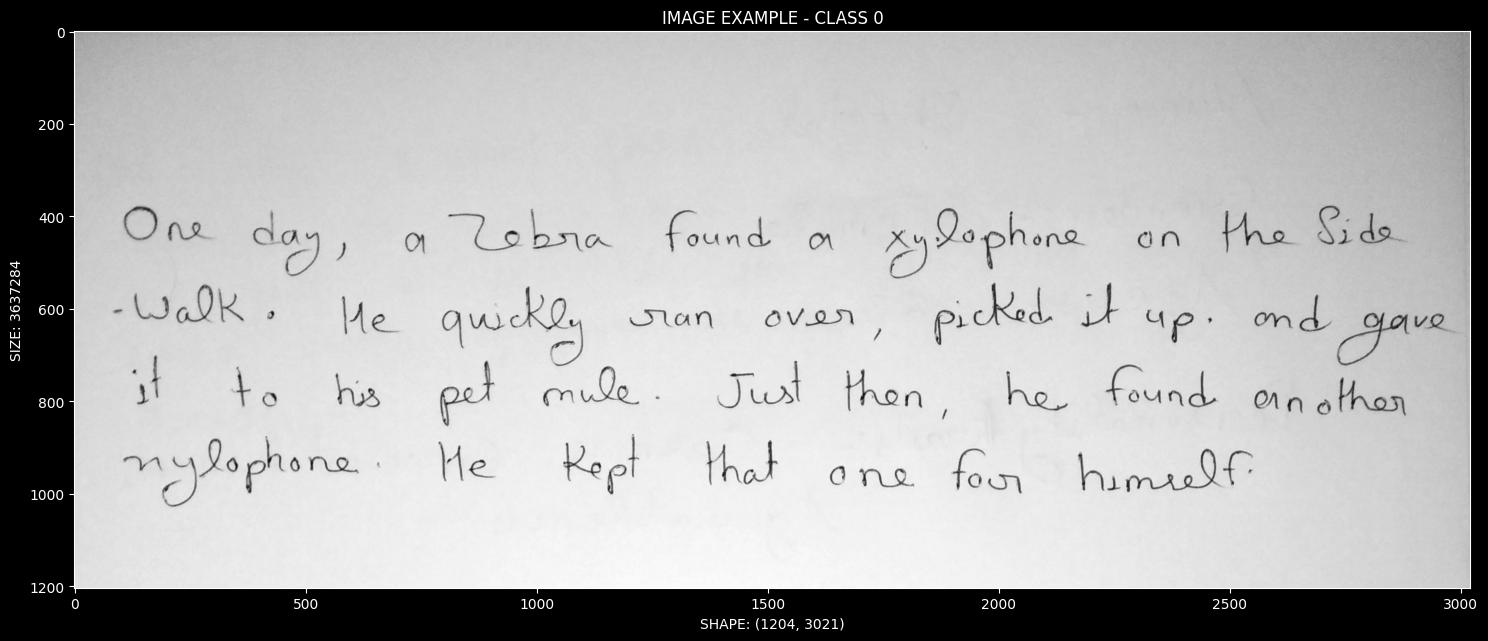

In [ ]:
SIMPLEVISIMG(i_f.img,main_data.CLASS[5])

In [ ]:
cc_f = EXTRACTWRITING()
c_f = cc_f._CONTOURS(main_data.PATH[5])
print(f"IMAGE-CONTOUR SHAPE: {c_f.shape}")

IMAGE-CONTOUR SHAPE: (1204, 3021)


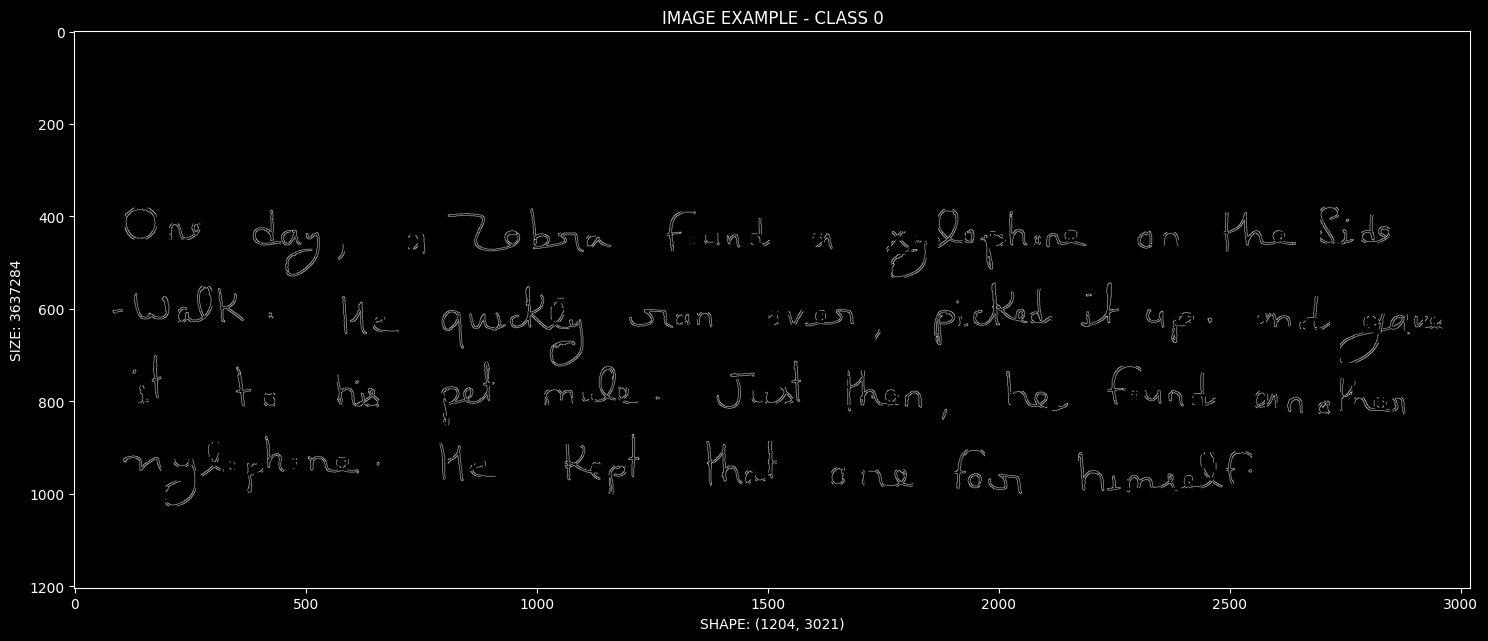

In [ ]:
SIMPLEVISIMG(c_f,main_data.CLASS[5])

In [ ]:
cc_f = EXTRACTWRITING()
c_f = cc_f._CONTOURS(main_data.PATH[0])
print(f"IMAGE-CONTOUR SHAPE: {c_f.shape}")

IMAGE-CONTOUR SHAPE: (517, 1232)


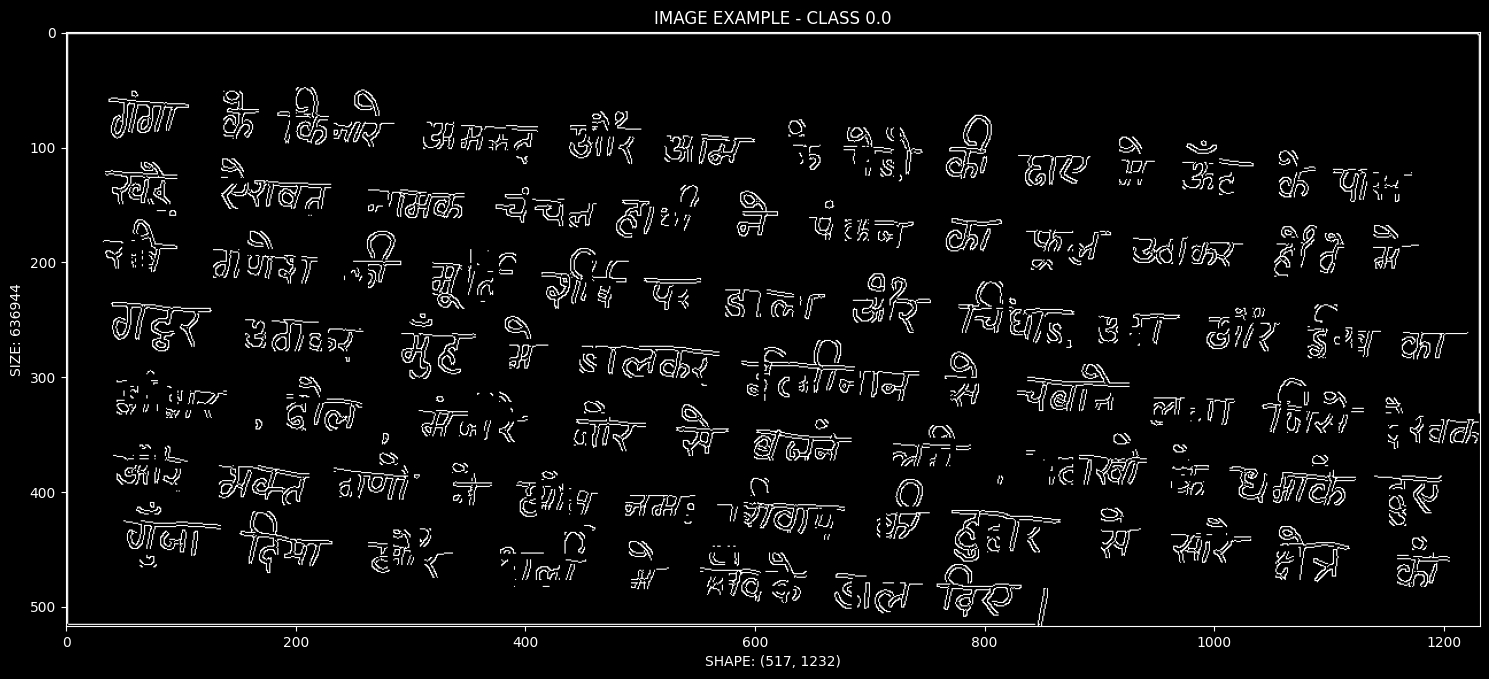

In [ ]:
SIMPLEVISIMG(c_f,main_data.CLASS[0])

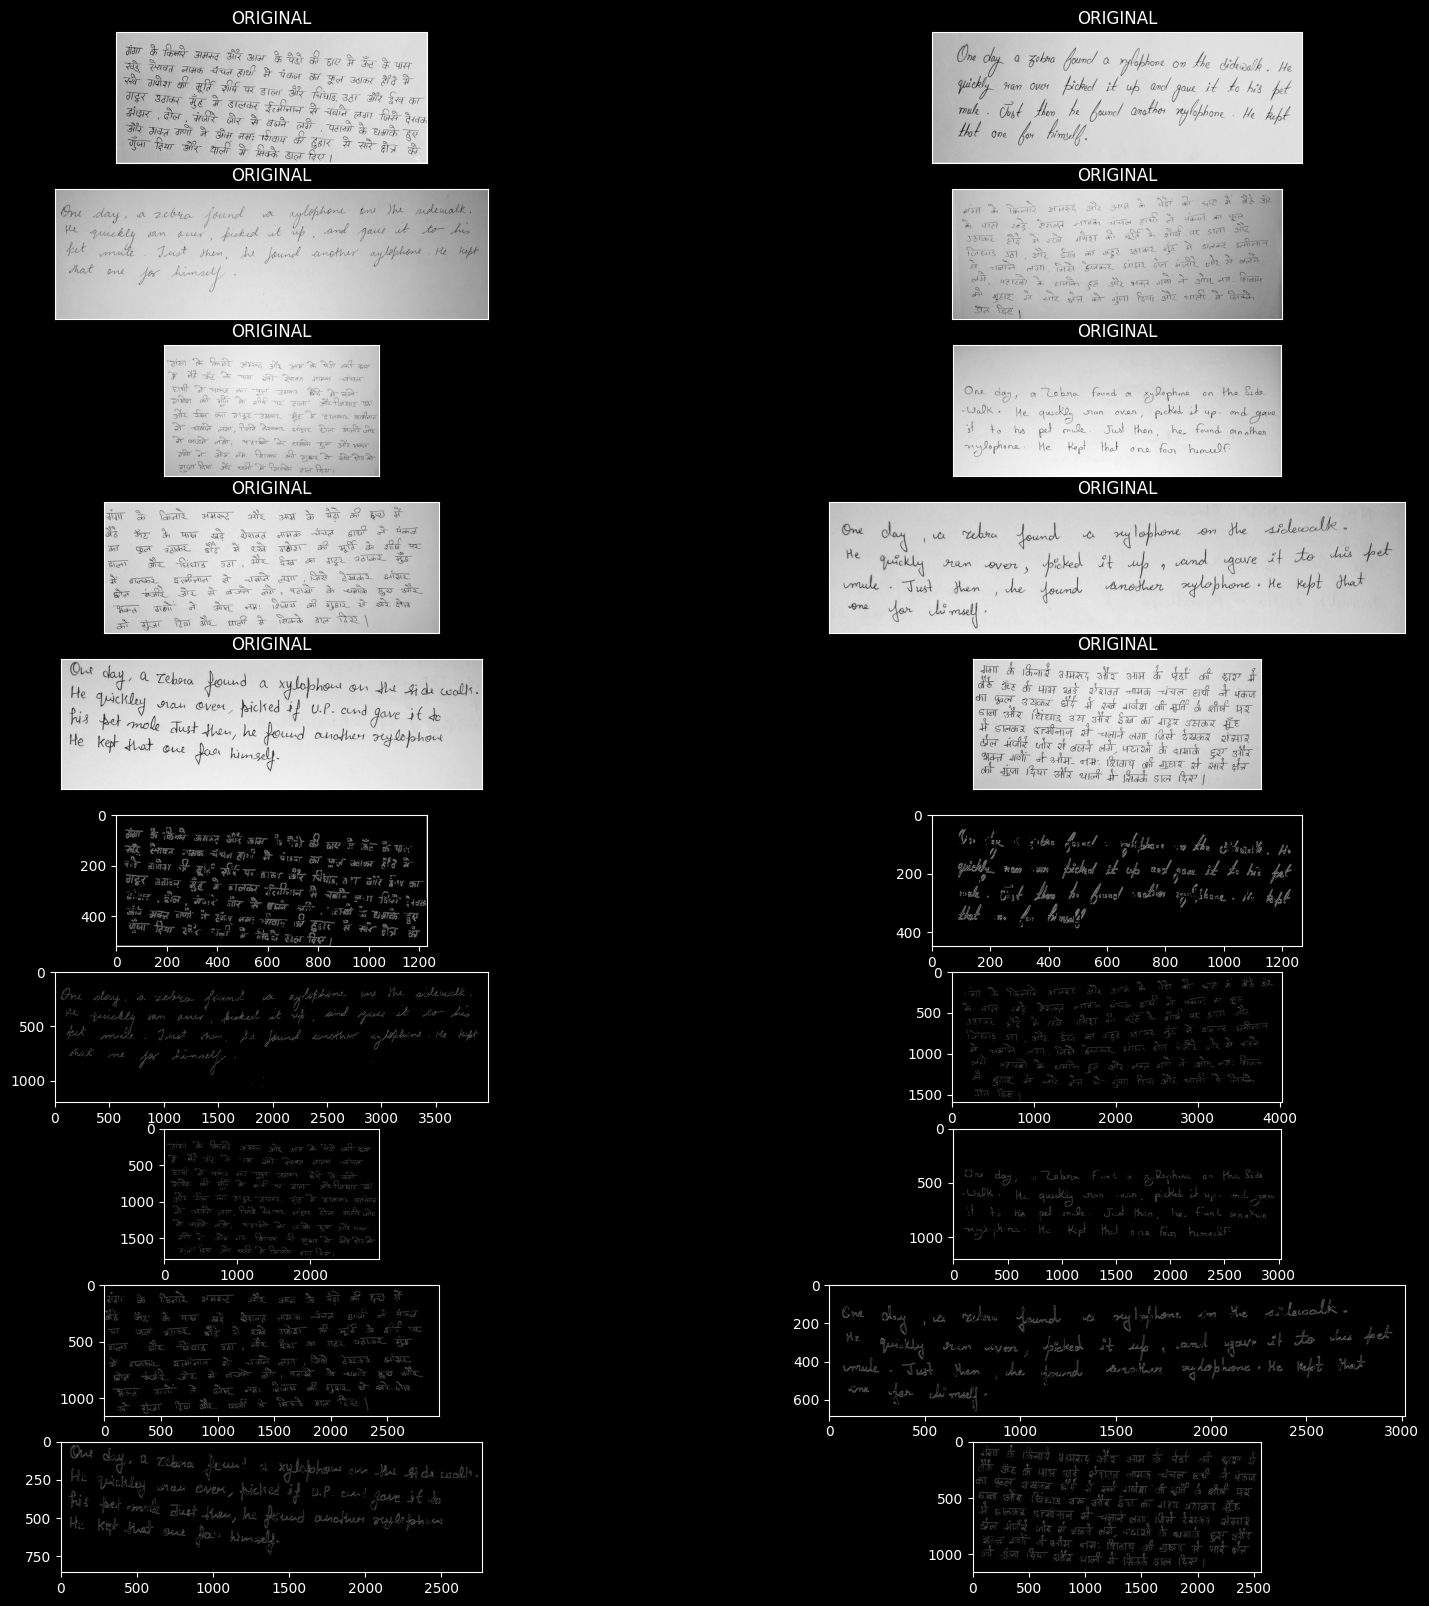

In [ ]:
# plotting sample contour images
plt.figure(figsize=(20,20))
for _i in range(10):
    pp = EXTRACTWRITING()
    pp._READIMG(main_data.PATH[_i])
    ax = plt.subplot(10,2,_i+1)
    plt.title("ORIGINAL")
    plt.imshow(pp.img)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(10,2,_i+10+1)
    pp._TRANSFER(main_data.PATH[_i])
    plt.imshow(pp.transfer)

# Data Preprocessing

In [ ]:
data_in = []
label_in = []

In [ ]:
# Preprocessing the data
for xr_ in range(len(main_data)):
    img = cv.cvtColor(cv.imread(main_data.PATH[xr_]),cv.COLOR_BGR2GRAY) # Converts an image from one color space to another.
    blur = cv.GaussianBlur(img,(5,5),0) # Blurs an image using a Gaussian filter.
    tcnny = cv.Canny(blur,30,150) # edge detection algorithm
    rsz = cv.resize(tcnny,(224,224))
    data_in.append(rsz)
    label_in.append(main_data.CLASS[xr_])

In [ ]:
print(f"TOTAL DATA LENGTH: {len(data_in)}")
print(f"TOTAL CLASS LENGTH: {len(label_in)}")

TOTAL DATA LENGTH: 445
TOTAL CLASS LENGTH: 445


In [ ]:
# sample image array
data_in[4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Data Augmententation using ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True,
                            rotation_range=10,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            validation_split=0.2,
                            rescale=1./255,
                            fill_mode="nearest")

In [ ]:
# flow_from_directory: Takes the path to a directory & generates batches of augmented data.
train_it = datagen.flow_from_directory(main_path,
                                       class_mode='categorical',
                                       target_size=(224, 224),
                                       batch_size=4,
                                       color_mode="grayscale",
                                       seed=7)
val_it = datagen.flow_from_directory(main_path,
                                       class_mode='categorical',
                                       target_size=(224, 224),
                                       batch_size=4,
                                       color_mode="grayscale",
                                       seed=7)
test_it = datagen.flow_from_directory(shreya_test_path,
                                       class_mode='categorical',
                                       target_size=(224, 224),
                                       batch_size=4,
                                      color_mode="grayscale",
                                       seed=7)
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 401 images belonging to 5 classes.
Found 401 images belonging to 5 classes.
Found 44 images belonging to 5 classes.
Batch shape=(4, 224, 224, 1), min=0.000, max=1.000


In [ ]:
data_array = np.array(data_in,dtype="float32")/255.   # converting to np array
label_array = np.array(label_in,dtype="float32")  # converting to np array

In [ ]:
print(f"TOTAL DATA ARRAY SHAPE: {data_array.shape}")
print(f"TOTAL CLASS ARRAY SHAPE: {label_array.shape}")

TOTAL DATA ARRAY SHAPE: (445, 224, 224)
TOTAL CLASS ARRAY SHAPE: (445,)


In [ ]:
data_array = data_array.reshape(data_array.shape[0],
                               data_array.shape[1],
                               data_array.shape[2],
                               1)

In [ ]:
print(f"TOTAL DATA ARRAY SHAPE: {data_array.shape}")

TOTAL DATA ARRAY SHAPE: (445, 224, 224, 1)


In [ ]:
exp_img = data_array[0]
print(f"EXAMPLE IMAGE SHAPE: {exp_img.shape}")

EXAMPLE IMAGE SHAPE: (224, 224, 1)


# Fitting CNN model

In [ ]:
datagen.fit(data_array)

In [ ]:
label_array = to_categorical(label_array,len(5)) # Converts a class vector (integers) to binary class matrix. (one-hot-encoding)

In [ ]:
print(f"SHAPE OF TARGET CLASSES: {label_array.shape}")

SHAPE OF TARGET CLASSES: (445, 5)


In [ ]:
print(f"TARGET SHAPE: {data_array[0].shape}")

TARGET SHAPE: (224, 224, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(24,(3,3),activation="relu",input_shape=(224,224,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2),strides=2))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2),strides=2))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2),strides=2))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(len(5),activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [ ]:
cnn_model = model.fit(datagen.flow(data_array,
                                   label_array,
                                   batch_size=32,
                                   subset="training"),
                      epochs=30,
                      shuffle=True)

Epoch 1/30
11/11 [==============================] - 68s 6s/step - loss: 6.3023 - accuracy: 0.2710
Epoch 2/30
11/11 [==============================] - 60s 6s/step - loss: 1.4343 - accuracy: 0.3583
Epoch 3/30
11/11 [==============================] - 56s 5s/step - loss: 1.3643 - accuracy: 0.3832
Epoch 4/30
11/11 [==============================] - 57s 5s/step - loss: 1.3326 - accuracy: 0.3925
Epoch 5/30
11/11 [==============================] - 61s 5s/step - loss: 1.3265 - accuracy: 0.2928
Epoch 6/30
11/11 [==============================] - 59s 5s/step - loss: 1.3646 - accuracy: 0.3925
Epoch 7/30
11/11 [==============================] - 58s 5s/step - loss: 1.3042 - accuracy: 0.3925
Epoch 8/30
11/11 [==============================] - 57s 5s/step - loss: 1.3469 - accuracy: 0.3925
Epoch 9/30
11/11 [==============================] - 62s 5s/step - loss: 1.3153 - accuracy: 0.3801
Epoch 10/30
11/11 [==============================] - 68s 6s/step - loss: 1.3094 - accuracy: 0.3894
Epoch 11/30
11/11 [

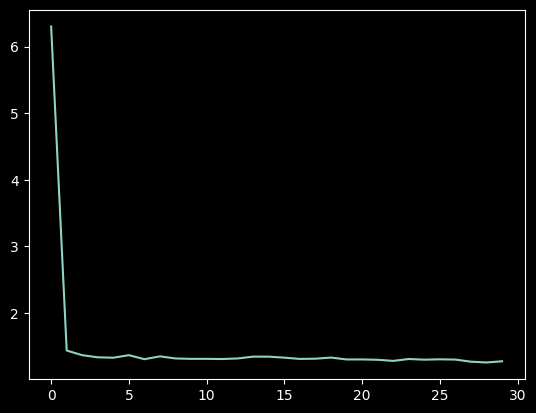

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cnn_model.history['loss'])

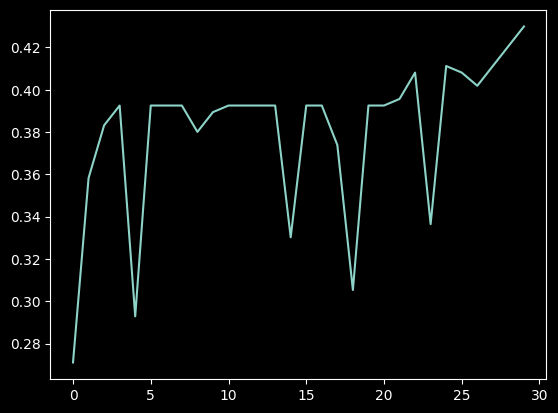

In [ ]:
plt.plot(cnn_model.history['accuracy'])

# Fitting RCNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Reshape

In [ ]:
# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Reshape the output of the convolutional layers for input to the recurrent layer
model.add(Reshape((-1, 128)))

# Recurrent layer (LSTM)
model.add(LSTM(64, return_sequences=True))

# Flatten the output of the recurrent layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
rcnn_model = model.fit(train_it, validation_data=val_it, epochs=30)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/30
101/101 [==============================] - 159s 2s/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 2/30
101/101 [==============================] - 147s 1s/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 3/30
101/101 [==============================] - 148s 1s/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 4/30
101/101 [==============================] - 144s 1s/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 5/30
101/101 [==============================] - 147s 1s/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 6/30
101/101 [==============================] - 145s 1s/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 7/30
101/101 [==============================] - 145s 1s/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000

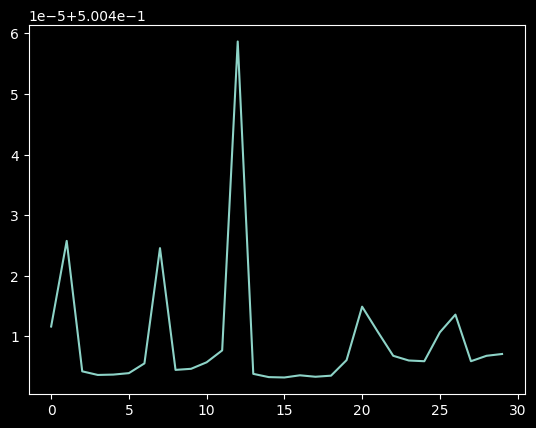

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rcnn_model.history['loss'])

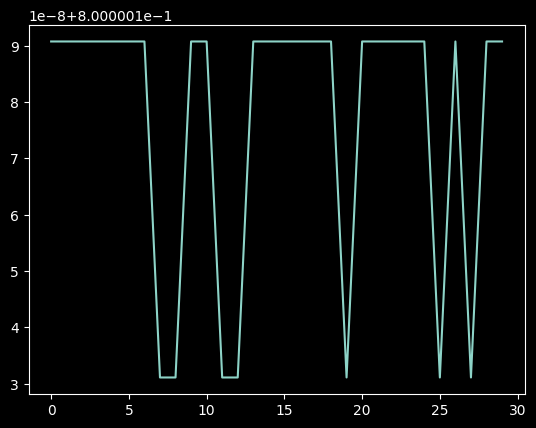

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rcnn_model.history['accuracy'])